# Statistics 101

## Basic concepts

**Population**  
A population is any large collection of objects or individuals, such as Americans, students, or trees about which information is desired.

**Parameter**  
A parameter is any summary number, like an average or percentage, that describes the entire population.

**Sample**  
A sample is a representative group drawn from the population.

**Statistic**  
A statistic is any summary number, like an average or percentage, that describes the sample.


**Descriptive statistics** is the branch of statistics that involves organizing, displaying, and describing data.

**Inferential statistics** is the branch of statistics that involves drawing conclusions about a population based on information contained in a sample taken from that population.

### Basic quantities

#### Mean

There are many kinds of means (arithmetic, geometric, harmonic, ...), but for most purposes we will be using the arithmetic mean.

$$ \overline{X} = \frac{1}{n}\sum_{i=1}^n X_i $$

#### Quantiles and median

Quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities, or dividing the observations in a sample in the same way.

<img src="https://www.hackmath.net/images/quartiles.png">

The median is the 50% quantile ("the middle quantile").

#### Variance

Variance is the measure of how far a set of (random) numbers are spread out from their average value.

$$Var(X) = E\left[ (X - \mu)^2 \right] = E[X^2] - E[X]^2$$

#### Standard deviation

Square root of the variance. Useful because it's expressed in the same units as the variable.

$$SD(X) = \sigma_X = \sqrt{E\left[ (X - \mu)^2 \right]}$$

#### Covariance

A measure of how two (random) variables vary with respect to each other.

$$cov(X,Y) = E\left[ \left( X-E[X] \right) \left( Y-E[Y] \right) \right]$$

#### Standardization

For a series of values, the process of standardization involves subtracting the mean to each values and dividing it by the standard deviation.

$$X_{\text{standard}} = \frac{X - \mu_x}{SD(X)}$$

#### Correlation

Correlation is the standardized covariance (or the covariance of standardized variables).

$$corr = \frac{cov(X,Y)}{\sigma_X\sigma_Y} = cov \left( \frac{X-E[X]}{\sigma_X},\frac{Y-E[Y]}{\sigma_Y}\right)$$

Correlation can be quite useful because it is adimensional and $-1 \leq corr(X,Y) \leq 1$.

<img src="https://www.logoworks.com/blog/wp-content/uploads/2014/05/09.jpg">

# Statistical distributions - Modeling events

Distributions allow us to model events and get more information about them. We can solve problems by using them. 
Distributions can be either discrete or continuous depending on what they describe.

In [2]:
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
plt.rcParams["figure.figsize"] = 16, 6

## Discrete distributions

#### Bernoulli

A Bernoulli distribution has only two possible outcomes, namely 1 (success) and 0 (failure), and a single trial. So the random variable X which has a Bernoulli distribution can take value 1 with the probability of success $p$, and the value 0 with the probability of failure $q = (1-p)$ . If a variable X is a Bernoulli trial, it is indicated as $X \sim Bern(p)$
 
The probability mass function (PMF) can be written as:

$$
P = \left\lbrace
\begin{array}{l}
1 -p \quad x =0\\
p \;\;\qquad x=1\\
\end{array}
\right.
$$

A typical Bernoulli trial distribution might look like in figure.

<figure style="text-align:center">
  <img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2017/09/18164417/Binomial-graph.png" alt="" style="width:60%;text-align:center">
  <figcaption style="text-align:center">Example of a Bernoulli distribution</figcaption>
</figure>

#### Binomial

The binomial distribution describes the number of success in $n$ independent $Bern(p)$.

The PMF for a Binomial distribution for a variable $X \sim Bin(n, p)$ is:

$$ P(X=k) = \binom{n}{k} p^k(1-p)^{n-k}$$



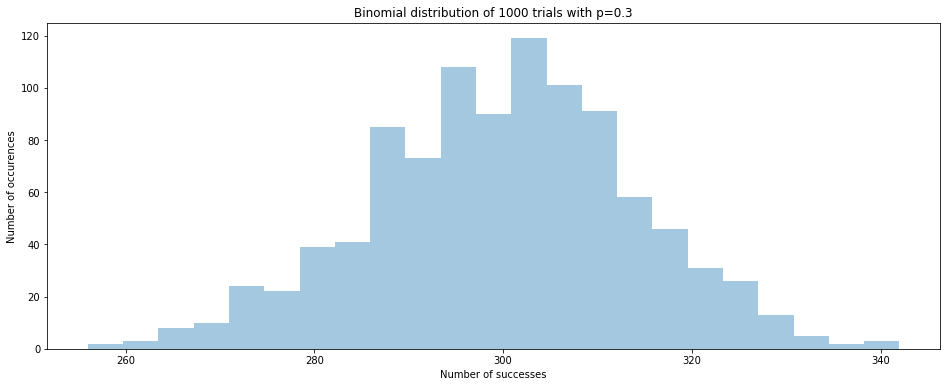

In [4]:
n = 1000
p = 0.3
binom_data = stats.binom.rvs(
    n, p, 
    size=n
)

sns.distplot(binom_data, kde=False,
    hist_kws={"linewidth":15})

plt.title(f"Binomial distribution of {n} trials with p={p}")
plt.ylabel("Number of occurences")
plt.xlabel("Number of successes")
plt.show()

#### Poisson

The Poisson distribution is used to model the number of events that occur in a limited time or space if these events occur with a known constant mean rate and independently of time or each other.

Some examples that might be approximated by a Poisson distribution are:
 - The number of emergency calls recorded at a hospital in a day.
 - The number of thefts reported in an area on a day.
 - The number of customers arriving at a salon in an hour.
 - The number of printing errors at each page of the book.

The PMF for a Poisson distribution for a variable $X \sim Pois(\lambda)$ is:

$$P(X=k) = e^{-\lambda} \frac{\lambda^k}{k!}$$

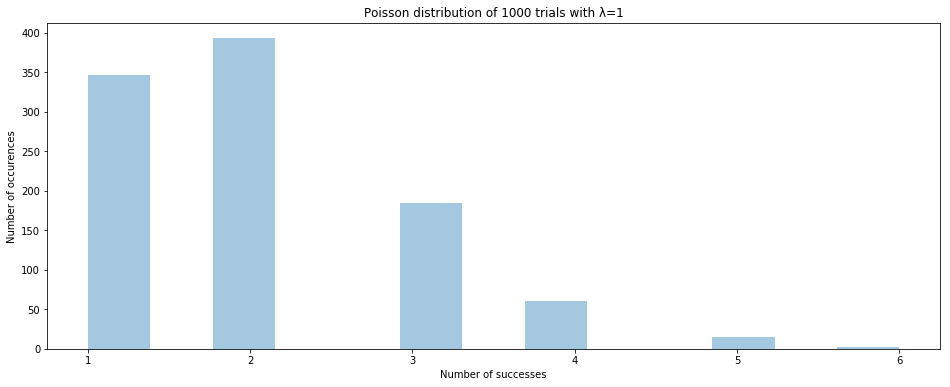

In [5]:
λ = 1
pois_data = stats.poisson.rvs(λ, loc=1, size=n)

sns.distplot(pois_data, kde=False,
    hist_kws={"linewidth":15})

plt.title(f"Poisson distribution of {n} trials with λ={λ}")
plt.ylabel("Number of occurences")
plt.xlabel("Number of successes")
plt.show()

## Continuous distributions

#### Uniform

As the name suggests, the Uniform distribution ($Unif(a, b)$) has the same value everywhere, with PDF:

$$
f(x) = \left\lbrace
\begin{array}{l}
\frac{1}{b-a} \quad x \in [a; b], b > a\\
0 \;\;\qquad \text{otherwise}\\
\end{array}
\right.
$$




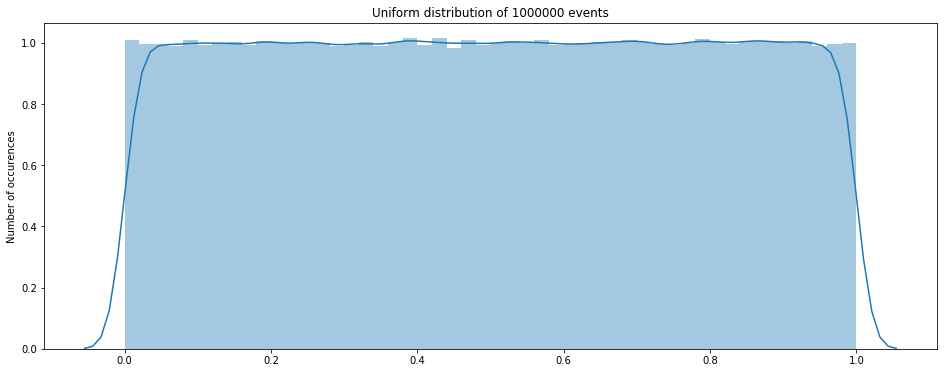

In [6]:

unif_data = stats.uniform.rvs(size=1000000)
# print(unif_data)

sns.distplot(unif_data, kde=True)

plt.title(f"Uniform distribution of 1000000 events")
plt.ylabel("Number of occurences")
plt.show()


#### Exponential

The exponential distribution is often concerned with the amount of time until some specific event occurs. For example, the following events can be modeled using an Exponential distribution:

1. Length of time beteeen metro arrivals,
2. Length of time between arrivals at a gas station
3. The life of an Air Conditioner
4. The number of earthquakes in a specific region in a given time period.
5. ...

The PDF of a variable $X \sim Expo(\lambda)$ is:


$$f(x) = \lambda e^{-\lambda x} \qquad \lambda >0$$

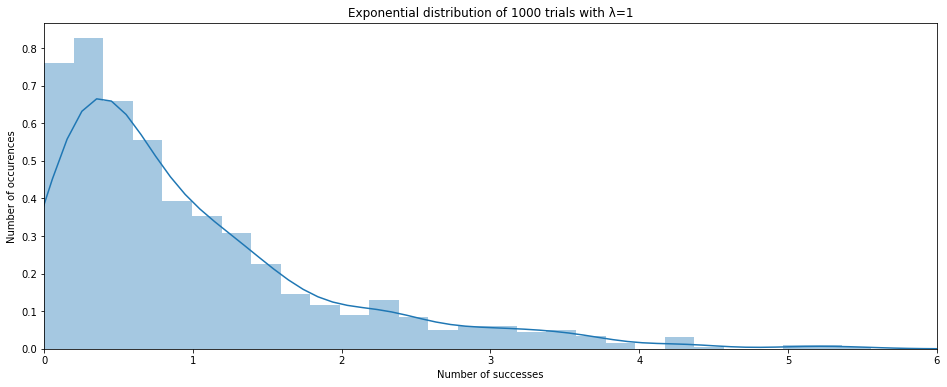

In [7]:
λ = 1
expo_data = stats.expon.rvs(0, scale=1/λ, size=n)

sns.distplot(expo_data, kde=True, hist_kws={"linewidth":15}, kde_kws={})

plt.title(f"Exponential distribution of {n} trials with λ={λ}")
plt.ylabel("Number of occurences")
plt.xlabel("Number of successes")
plt.xlim(0, 6)
plt.show()





#### Normal

NNormal distributions are important in statistics and are often used in the natural and social sciences to represent real-valued random variables whose distributions are not known.[1][2] Their importance is partly due to the central limit theorem.

The PDF of a random variable X following a normal distribution, $X \sim N(\mu, \sigma ^2)$, is given by:


$$f(x) = \frac{1}{\sqrt{2\pi}} e^{-\frac{1}{2} \left( \frac{X-\mu}{\sigma} \right)^2}$$


##### Relationship between probability and standard deviation


<figure style="text-align:center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Standard_deviation_diagram.svg/1280px-Standard_deviation_diagram.svg.png
" alt="" style="width:60%;text-align:center">
  <figcaption style="text-align:center">Relationship between $\sigma$ and probability in  $N(\mu, \sigma^2)$</figcaption>
</figure>



<figure style="text-align:center">
  <img src="https://statisticsblog.com/wp-content/uploads/2012/10/ProbOfRightAnswer.jpg" alt="" style="width:60%;text-align:center">
  <figcaption style="text-align:center">Probability!!</figcaption>
</figure>

# Probability

There are two broad categories of probability interpretations which can be called "physical" and "evidential" probabilities. 

**Physical probabilities**, which are also called objective or frequency probabilities, are associated with random physical systems such as roulette wheels, rolling dice and radioactive atoms. In such systems, a given type of event (such as a die yielding a six) tends to occur at a persistent rate, or "relative frequency", in a long run of trials. Physical probabilities either explain, or are invoked to explain, these stable frequencies.

**Evidential probability**, also called Bayesian probability, can be assigned to any statement whatsoever, even when no random process is involved, as a way to represent its subjective plausibility, or the degree to which the statement is supported by the available evidence. On most accounts, evidential probabilities are considered to be degrees of belief.

## Conditional probability

In probability theory, conditional probability is a measure of the probability of an event occurring given that another event has (by assumption, presumption, assertion or evidence) occurred.

The probability of event $A$ occurring, given the event $B$ is indicated in notation as $P(A|B)$. This quantity can be measured in terms of $A$ and $B$ as:

$$P(A|B) = \frac{P(A \cap B)}{P(B)}$$

Bayes rule follows from this as:
$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$


#### Note

In general $P(A|B) \neq P(B|A)$. This is sometimes known as the prosecutor's fallacy due to its (mis)use in some infamous trials.

## Inference using conditional probabilities

We will look at two examples:

#### Example 1

```
A rare disease affects 1% of the population. A pharmaceutical company manufactures and distributes tests to detect the disease.
The tests are advertised as '95% accurate'.

What is the probability that a person has the disease, given that they tested positive?
```


#### Example 2

```
You are looking at a product on Amazon. The product is available at three different sellers.

 - The first seller has 3000 reviews and an average score of 85%.
 - The second seller has 5 reviews and an average score of 100%.
 - The third seller has 250 reviews and an average score of 88%.
 
 Which seller should you choose to maximize the probability of having a positive interaction?
```

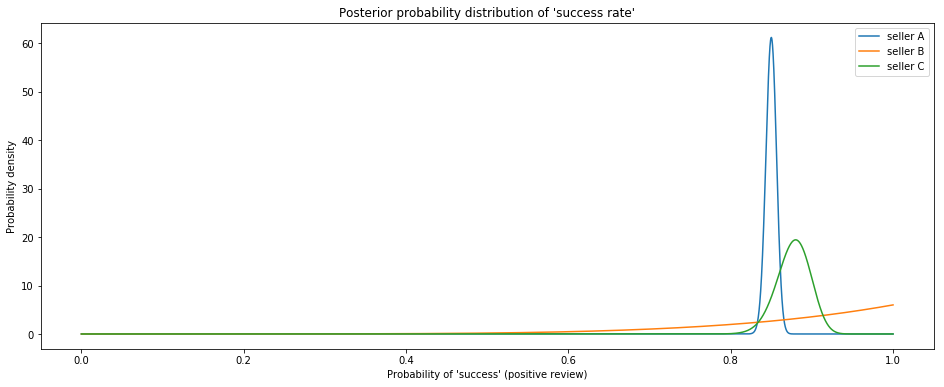

In [37]:
import numpy as np

x = np.linspace(0, 1, 10000)

b1 = stats.beta.pdf(x, 2551, 451)
b2 = stats.beta.pdf(x, 6, 1)
b3 = stats.beta.pdf(x, 221, 31)

plt.plot(x, b1, label="seller A")
plt.plot(x, b2, label="seller B")
plt.plot(x, b3, label="seller C")

plt.legend()
plt.xlabel("Probability of 'success' (positive review)")
plt.ylabel("Probability density")
plt.title("Posterior probability distribution of 'success rate'")
plt.show()


## You can use the binomial pmf to estimate the probability of "meeting" the success rate given by the avergae score

## Significance and hypothesis testing

Hypothesis testing is used to assess the plausibility of a hypothesis by using sample data. Such data may come from a larger population, or from a data-generating process.  

When performing hypothesis testing you always compare two different hypothesis:
 - $H_0$ (H-null) is the hypothesis that negates what you are trying to prove (i.e. no effect).
 - $H_1$ is the hypothesis that there is an effect on the population.
 
The most used parameter that describes hypothesis testing is the **p-value**.  

The **p-value** is defined as the probability of obtaining test results at least as extreme as the results actually observed during the test, **assuming that the null hypothesis is correct**.

#### Example

```
A goalkeeper in his career has blocked 27 out of 50 penalty kicks.

Can we assert that his long term block average is over 50%?
What if the blocks are 270 over 500?
```

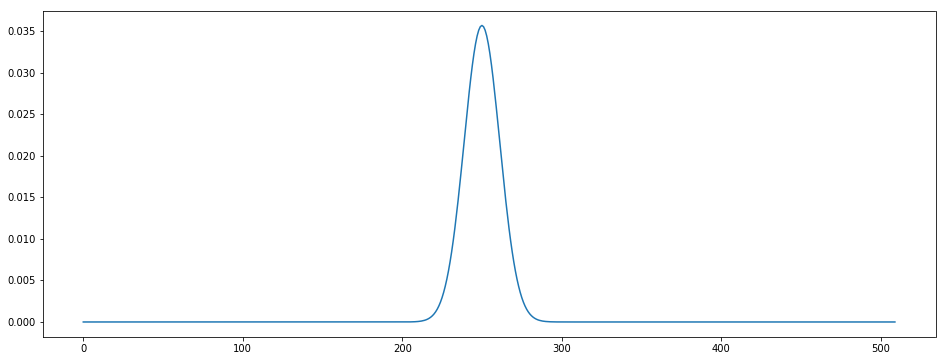

0.03330483459228606


In [45]:
import numpy as np

x = list(range(510))

p = stats.binom.pmf(x, 500, 0.5)
plt.plot(x, p)

plt.xlabel("")
plt.ylabel("")
plt.title("")
plt.show()

print(1 - stats.binom.cdf(270, 500, 0.5))



## Law of Large Numbers (LLN)

LLN is a **theorem** that describes the result of performing the same experiment a large number of times. According to the law, the average of the results obtained from a large number of trials should be close to the expected value and will tend to become closer to the expected value as more trials are performed.

This guarantees stable long term results for repeated experiments!

There are two different formulations of this law that applies under different assumptions.

#### Weak Law

The weak law of large numbers states that the sample average  $$\overline{X}_n = \frac{1}{n} \sum_i^n X_i$$ converges in probability towards the expected value.

$$ \overline{X}_n \xrightarrow[]{P} \mu  \quad as \;n \rightarrow \infty$$

which translates into:

$$\lim_{n\rightarrow \infty} P\left( | \overline{X}_n - \mu| > \varepsilon \right)= 0 \qquad \forall \varepsilon > 0$$


#### Strong Law
The strong law of large numbers states that the sample average $$\overline{X}_n = \frac{1}{n} \sum_i^n X_i$$ converges almost surely to the expected value

$$ \overline{X}_n \xrightarrow[]{a.s.} \mu  \quad as \;n \rightarrow \infty$$

which translates into:

$$P\left(\lim_{n\rightarrow \infty} \overline{X}_n = \mu \right) = 1$$

#### Implications

## Central Limit Theorem (CLT)
The CLT is a consequence of the LLN and it's probably one of the most useful theorems in statistics.

The statements is that, given a sum of $n$ $iid$ random variables, their distribution converges to $N(\mu, \sigma^2)$ as $n \rightarrow \infty$.



<figure style="text-align:center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/7b/IllustrationCentralTheorem.png/1280px-IllustrationCentralTheorem.png" alt="" style="width:60%;text-align:center">
  <figcaption style="text-align:center">CLT illustrated</figcaption>
</figure>


#### Formulation



#### Applications

 #### Example

```
How can we estimate how many items are classified correctly in our database?
```